In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../../data/'
pclim = path+'cmems_climatology_mon.nc'

tl,zl,yl,xl = slice(None),slice(-1),slice(-8,8),slice(170,200)
with xr.open_dataset(pclim) as clim:
    t = clim['thetao'][tl,zl].loc[:,:,yl,xl]
    s = clim['so'][tl,zl].loc[:,:,yl,xl]
    print(t.shape)
    to = t.mean(['time','latitude','longitude']).values
    so = s.mean(['time','latitude','longitude']).values
    dep = clim['depth'][zl].values
    dr = np.zeros(dep.shape)
    lev = 0
    for i in range(dep.size):
        dr[i] = 2*(dep[i]-lev)
        lev += dr[i]
pdo = sw.dens0(so,to)
pmo,ceo = dymodes(pdo,dr)

(12, 49, 193, 361)


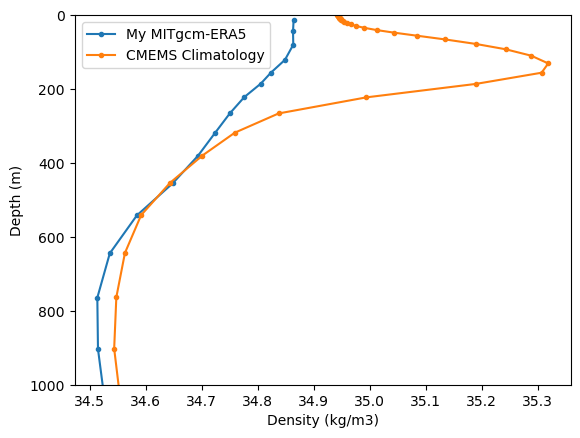

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from dymodes import dymodes
path = '../output/251113/'
pgrid = path+'grid.nc'
pdync = path+'dync.nc'
with xr.open_dataset(pgrid) as grid:
    z = -grid['Z'].values
    dz = grid['Zl'].values-grid['Zu'].values

i = 29
tl,zl,yl,xl = slice(i*12,(i+1)*12),slice(None),slice(-8,8),slice(170,200)
with xr.open_dataset(pdync) as dync:
    t = dync['THETA'][tl].loc[:,zl,yl,xl]
    s = dync['SALT'][tl].loc[:,zl,yl,xl]
    t,s = t.where(t), s.where(s)
    t = t.mean(['T','Y','X']).values
    s = s.mean(['T','Y','X']).values
    u = dync['UVEL'][tl].loc[:,zl,yl,xl]
    x = u[u.dims[3]].values
    y = u[u.dims[2]].values
pd = sw.dens0(s,t)
pm,ce = dymodes(pd,dz)
plt.plot(s,z,marker='.',label='My MITgcm-ERA5')
plt.plot(so,dep,marker='.',label='CMEMS Climatology')
plt.gca().invert_yaxis()
plt.xlabel('Density (kg/m3)')
plt.ylabel('Depth (m)')
plt.ylim(1000,0)
plt.legend()